In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
notas = pd.read_csv('dados/ratings.csv')

## Explorando os dados

In [5]:
notas.head() # exibe as 5 primeiras linhas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas.shape # exibe a quantidade de linhas e colunas

(100836, 4)

In [7]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
notas['nota'].unique() # exibe os valores únicos da coluna nota

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [10]:
# notas['nota'].value_counts().sort_index(ascending=False) #conta quantas vezes cada nota aparece e ordena do maior para o menor pelo índice (nota)
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [11]:
notas['nota'].mean() # média das notas

3.501556983616962

In [12]:
notas.nota.median() # mediana das notas

3.5

<Axes: ylabel='Frequency'>

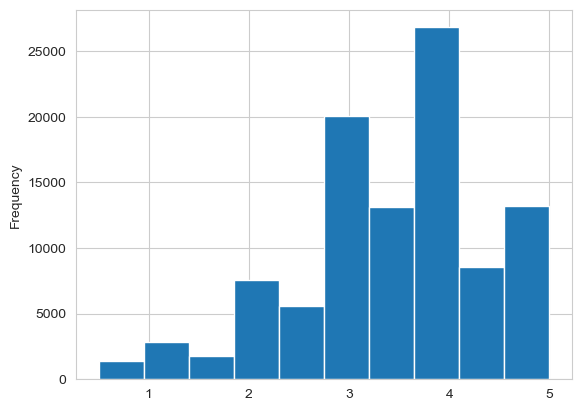

In [13]:
notas.nota.plot(kind='hist') # histograma das notas

In [14]:
notas.nota.describe() # estatísticas descritivas das notas

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [15]:
import seaborn as sns

<Axes: >

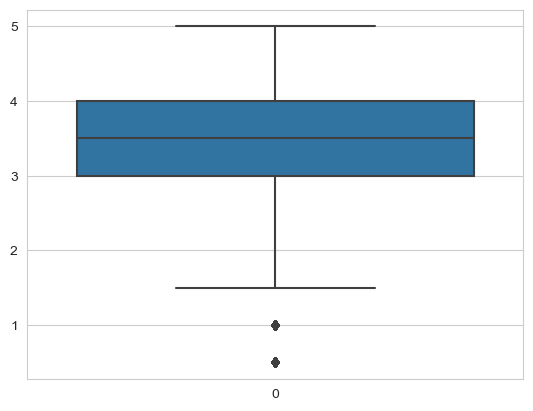

In [16]:
sns.boxplot(notas.nota) # boxplot das notas

In [17]:
filmes = pd.read_csv('dados/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Analisando algumas notas específicas por filme

In [18]:
notas.query('filmeId==1').nota.mean() # média das notas do filme 1

3.9209302325581397

In [19]:
notas.query('filmeId==1').nota.mean() > notas.nota.mean() # compara a média das notas do filme 1 com a média das notas de todos os filmes

True

In [20]:
# notas.groupby('filmeId').mean().nota.head() # agrupa as notas por filme e calcula a média (exibe as 5 primeiras linhas)
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

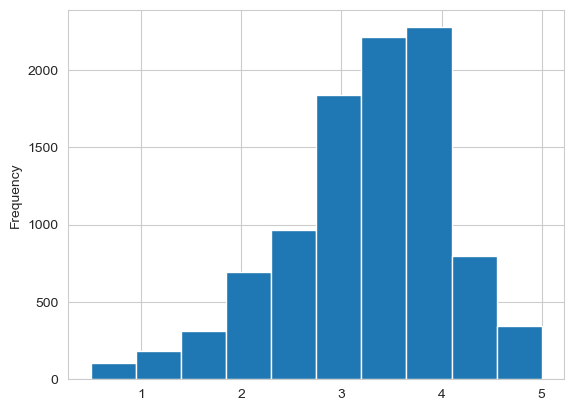

In [21]:
medias_por_filme.plot(kind='hist') # histograma das médias por filme

<Axes: ylabel='nota'>

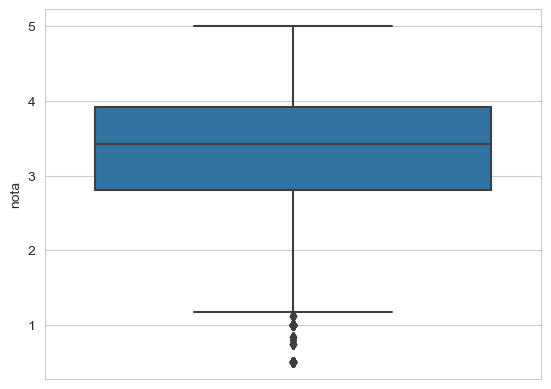

In [22]:
sns.boxplot(y=medias_por_filme) # boxplot das médias por filme

In [23]:
medias_por_filme.describe() # estatísticas descritivas das médias por filme

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/Users/prvrc/anaconda3/envs/untitled/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='nota', ylabel='Count'>

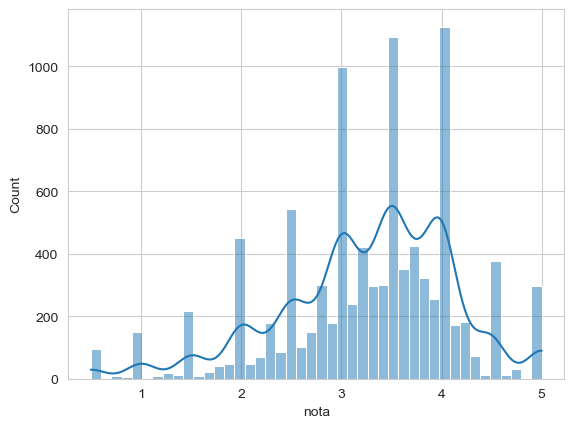

In [24]:
sns.histplot(medias_por_filme, kde=True) # histograma das médias por filme 
# kde=True exibe a curva de densidade, que descreve a aproximação visual da distribuição dos dados

In [25]:
tmdb = pd.read_csv('dados/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Variável categórica nominal: não existe uma ordenação entre os valores

In [26]:
tmdb.original_language.unique() # exibe os valores únicos da coluna original_language
# variável categórica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [27]:
# Primeiro grau
# Segundo grau
# Terceiro grau
# 1 grau < 2 grau < 3 grau # variável categórica ordinal

# budget => orçamento => quantitativa contínua
# quantidade de votos => 1, 2, 3, 4, não tem 2.5 votos => quantitativa discreta

In [28]:
tmdb.original_language.value_counts() # conta quantas vezes cada valor aparece

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [29]:
# tmdb.original_language.value_counts().to_frame() # converte a série em dataframe
contagem_de_idioma = tmdb.original_language.value_counts().to_frame().reset_index() # converte a série em dataframe e reseta o índice
contagem_de_idioma.columns = ['original_language', 'total']
contagem_de_idioma.head()


,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

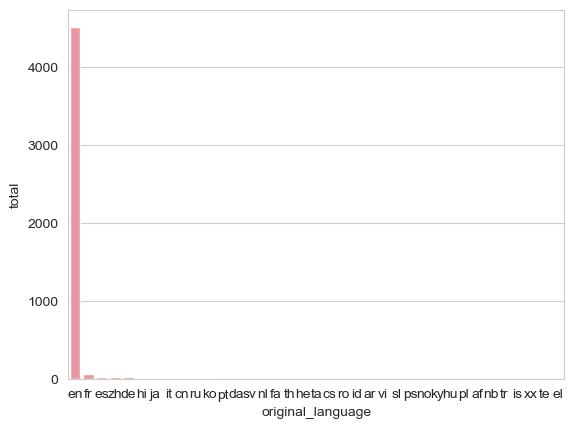

In [30]:
sns.barplot(x='original_language', y='total', data=contagem_de_idioma) # gráfico de barras do Seaborn
# sns.catplot(x='original_language', kind='count', data=tmdb)

In [31]:
total_por_idioma = tmdb['original_language'].value_counts()
total_geral = total_por_idioma.sum()
total_de_ingles = total_por_idioma.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [32]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

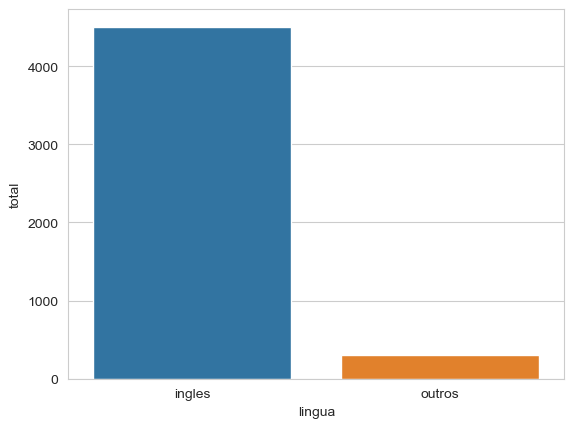

In [33]:
sns.barplot(x='lingua', y='total', data=dados)

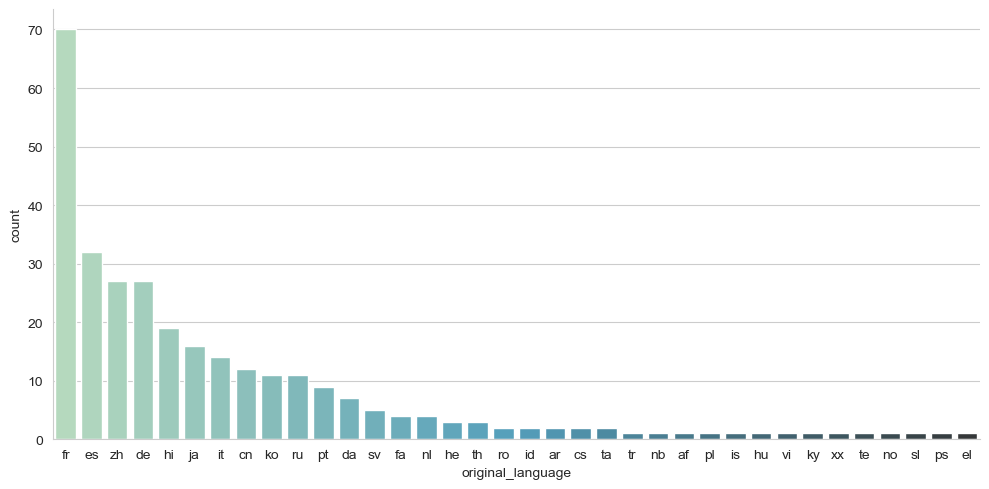

In [34]:
filmes_outros_idiomas = tmdb.query("original_language != 'en'")
sns.catplot(x='original_language', kind='count', 
            data=filmes_outros_idiomas, 
            aspect=2, 
            order=filmes_outros_idiomas.original_language.value_counts().index,
            palette='GnBu_d')

In [36]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [37]:
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [43]:
print('Nota média do Toy Story  : %.2f' % notas_do_toy_story.nota.mean())
print('Nota média do Jumanji    : %.2f' % notas_do_jumanji.nota.mean())

Nota média do Toy Story  : 3.92
Nota média do Jumanji    : 3.43


In [54]:
print('Nota mediana do Toy Story  : %.2f' % notas_do_toy_story.nota.median())
print('Nota mediana do Jumanji    : %.2f' % notas_do_jumanji.nota.median())

Nota mediana do Toy Story  : 4.00
Nota mediana do Jumanji    : 3.50


#### Média, mediana e moda permitem medir a tendência central das avaliações, mas não nos dizem como as notas estão distribuídas

<Axes: xlabel='filmeId', ylabel='nota'>

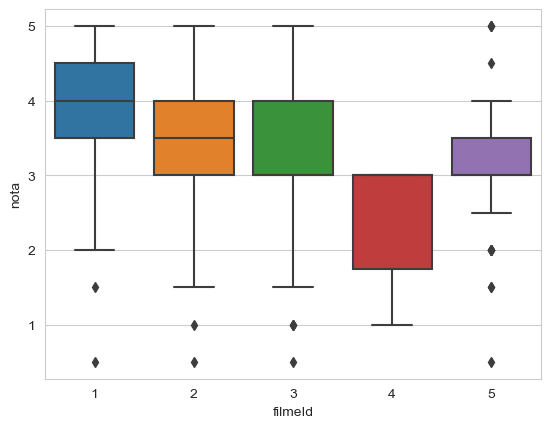

In [51]:
sns.boxplot(x='filmeId', y='nota', data=notas.query('filmeId in [1,2,3,4,5]'))

In [53]:
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std()) # desvio padrão

0.8348591407114045 0.8817134921476456


#### Dispersão de dados: variabilidade ou espalhamento dos dados, com a qual é possível obter a variância, o desvio padrão e a amplitude interquartil
#### Desvio padrão: mede o quanto os dados fogem da tendência central